# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

In [3]:
# check what last ten cities are 
cities[607:617]

['honda',
 'iracoubo',
 'talavera de la reina',
 'general roca',
 'arzachena',
 'sao joao evangelista']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [4]:
# test api
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city = "kodiak"
build_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

response = requests.get(build_url)
print(response.status_code)
weather = response.json()

200


In [5]:
# View the JSON response from the API
print(weather)

{'coord': {'lon': -152.4072, 'lat': 57.79}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 62.11, 'feels_like': 59.29, 'temp_min': 62.11, 'temp_max': 62.11, 'pressure': 1019, 'humidity': 27}, 'visibility': 10000, 'wind': {'speed': 11.5, 'deg': 320, 'gust': 18.41}, 'clouds': {'all': 0}, 'dt': 1652915382, 'sys': {'type': 1, 'id': 7668, 'country': 'US', 'sunrise': 1652881207, 'sunset': 1652941937}, 'timezone': -28800, 'id': 5866583, 'name': 'Saint Paul Harbor', 'cod': 200}


In [6]:

import pprint as pp
pp.pprint(weather)

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 57.79, 'lon': -152.4072},
 'dt': 1652915382,
 'id': 5866583,
 'main': {'feels_like': 59.29,
          'humidity': 27,
          'pressure': 1019,
          'temp': 62.11,
          'temp_max': 62.11,
          'temp_min': 62.11},
 'name': 'Saint Paul Harbor',
 'sys': {'country': 'US',
         'id': 7668,
         'sunrise': 1652881207,
         'sunset': 1652941937,
         'type': 1},
 'timezone': -28800,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 320, 'gust': 18.41, 'speed': 11.5}}


In [7]:
# Initialize variable (empty lists to store data from response)
lat = []
lng = []
country = []
clouds = []
date = []
name = []
wind = []
temp = []
pressure = []
humidity = []

# loop through cities and call API
for city in cities:
    
    # API request
    build_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    response = requests.get(build_url)
    status_code = response.status_code
    print(f"{city}: {status_code}")
    print()
    
    # create try catch for cities with missing data
    try:
        # get response into JSON
        weather = response.json()
        
        # seperate and append the data into their respective lists
        
        # seperate
        latitude = weather["coord"]["lat"]
        longitude = weather["coord"]["lon"]
        location = weather["sys"]["country"]
        cloudiness = weather["clouds"]["all"]
        dt = weather["dt"]
        city = weather["name"]
        wind_speed = weather["wind"]["speed"]
        main_temp = weather["main"]['temp']
        main_pressure = weather["main"]['pressure']
        main_humidity = weather["main"]['humidity']
        
        # append
        lat.append(latitude)
        lng.append(longitude)
        country.append(location)
        clouds.append(cloudiness)
        date.append(dt)
        name.append(city)
        wind.append(wind_speed)
        temp.append(main_temp)
        pressure.append(main_pressure)
        humidity.append(main_humidity)
        
    except Exception as e:
        print(e)
        
    time.sleep(1)
        

hilo: 200

sorong: 200

dikson: 200

mataura: 200

busselton: 200

ushuaia: 200

bambous virieux: 200

hermanus: 200

barentsburg: 404

'coord'
stornoway: 200

haines junction: 200

voyvozh: 200

nizhneyansk: 404

'coord'
sept-iles: 200

belushya guba: 404

'coord'
lagos: 200

zhigansk: 200

rio gallegos: 200

punta arenas: 200

tsiroanomandidy: 200

yebaishou: 200

chuy: 200

kreminna: 200

narsaq: 200

lavrentiya: 200

kletnya: 200

kapaa: 200

rikitea: 200

bredasdorp: 200

kaitangata: 200

kruisfontein: 200

butaritari: 200

meyungs: 404

'coord'
atuona: 200

prainha: 200

ponta do sol: 200

ostrovnoy: 200

lander: 200

rocha: 200

east london: 200

jamestown: 200

albany: 200

cambuga: 200

hithadhoo: 200

saint-pierre: 200

topolobampo: 200

tuktoyaktuk: 200

mareeba: 200

sur: 200

esperance: 200

bluff: 200

victoria: 200

bethel: 200

mehamn: 200

vao: 200

umm durman: 404

'coord'
klaksvik: 200

key west: 200

sarbi: 404

'coord'
baruun-urt: 200

barrow: 200

yellowknife: 200

vizantea: 404

'coord'
ugoofaaru: 200

bandarbeyla: 200

nurota: 200

korla: 200

uruzgan: 200

guarapari: 200

zhuhai: 200

varkkallai: 200

bar harbor: 200

yamada: 200

evensk: 200

brigantine: 200

guanica: 200

van: 200

severo-kurilsk: 200

aklavik: 200

olga: 200

tocopilla: 200

saint-joseph: 200

nemuro: 200

yankton: 200

secunda: 200

hamilton: 200

san bartolo: 200

alyangula: 200

aleksandrovka: 200

havoysund: 200

denpasar: 200

havre-saint-pierre: 200

satun: 200

padang: 200

arti: 200

lockhart: 200

chapleau: 200

glendive: 200

kirakira: 200

pochutla: 200

maghama: 404

'coord'
abu samrah: 200

casma: 200

mezen: 200

mardin: 200

indramayu: 200

marilia: 200

moron: 200

altamont: 200

mbaiki: 200

anchorage: 200

brae: 200

suifenhe: 200

palabuhanratu: 404

'coord'
oktyabrskoye: 200

akyab: 200

luderitz: 200

mayumba: 200

taguatinga: 200

ijaki: 404

'coord'
fasa: 200

lhuntshi: 404

'coord'
itoman: 200

lata: 200

rio grande: 200

buchanan: 200

nong kung si:

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Put data in DataFrame
df = pd.DataFrame()

df['City'] = name
df['Country'] = country
df['Latitude'] = lat
df['Longitude'] = lng
df['Date'] = date
df['Wind_Speed'] = wind
df['Pressure'] = pressure
df['Humidity'] = humidity
df['Temperature'] = temp
df['Cloudiness'] = clouds

df.head()

,City,Country,Latitude,Longitude,Date,Wind_Speed,Pressure,Humidity,Temperature,Cloudiness
0,Hilo,US,19.7297,-155.0900,1652915672,14.97,1017,73,82.04,0
1,Sorong,ID,-0.8833,131.2500,1652915676,4.65,1013,84,79.57,98
2,Dikson,RU,73.5069,80.5464,1652915677,14.09,1000,96,31.28,100
3,Mataura,NZ,-46.1927,168.8643,1652915624,7.25,994,87,50.23,70
4,Busselton,AU,-33.6500,115.3333,1652915680,1.95,1015,84,60.46,77


In [9]:
# Save to CSV
df.to_csv('weather_data.csv', index = False)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         554 non-null    object 
 1   Country      554 non-null    object 
 2   Latitude     554 non-null    float64
 3   Longitude    554 non-null    float64
 4   Date         554 non-null    int64  
 5   Wind_Speed   554 non-null    float64
 6   Pressure     554 non-null    int64  
 7   Humidity     554 non-null    int64  
 8   Temperature  554 non-null    float64
 9   Cloudiness   554 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 43.4+ KB


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
# find cities with humidity over 100%
mask = df.Humidity >= 100
high_humid = df.loc[mask]
high_humid

,City,Country,Latitude,Longitude,Date,Wind_Speed,Pressure,Humidity,Temperature,Cloudiness
283,Belaya Gora,RU,68.5333,146.4167,1652916079,8.95,1011,100,32.99,100
331,Bilibino,RU,68.0546,166.4372,1652915817,1.81,1012,100,35.78,100
381,Ponta Delgada,PT,37.7333,-25.6667,1652916220,21.85,1010,100,61.52,75
387,Perth,AU,-31.9333,115.8333,1652915964,6.91,1016,100,51.85,20
434,Port Hedland,AU,-20.3167,118.5667,1652916296,6.91,1016,100,69.85,8
437,Sioux Lookout,CA,50.1001,-91.9170,1652916300,5.75,1002,100,46.47,100


In [12]:
# No cities over 100% humidity
# Drop NA values
mask2 = df.Humidity <= 100
df2 = df.loc[mask2].dropna().reset_index(drop = True)
df2.head()

,City,Country,Latitude,Longitude,Date,Wind_Speed,Pressure,Humidity,Temperature,Cloudiness
0,Hilo,US,19.7297,-155.0900,1652915672,14.97,1017,73,82.04,0
1,Sorong,ID,-0.8833,131.2500,1652915676,4.65,1013,84,79.57,98
2,Dikson,RU,73.5069,80.5464,1652915677,14.09,1000,96,31.28,100
3,Mataura,NZ,-46.1927,168.8643,1652915624,7.25,994,87,50.23,70
4,Busselton,AU,-33.6500,115.3333,1652915680,1.95,1015,84,60.46,77


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         554 non-null    object 
 1   Country      554 non-null    object 
 2   Latitude     554 non-null    float64
 3   Longitude    554 non-null    float64
 4   Date         554 non-null    int64  
 5   Wind_Speed   554 non-null    float64
 6   Pressure     554 non-null    int64  
 7   Humidity     554 non-null    int64  
 8   Temperature  554 non-null    float64
 9   Cloudiness   554 non-null    int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 43.4+ KB


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

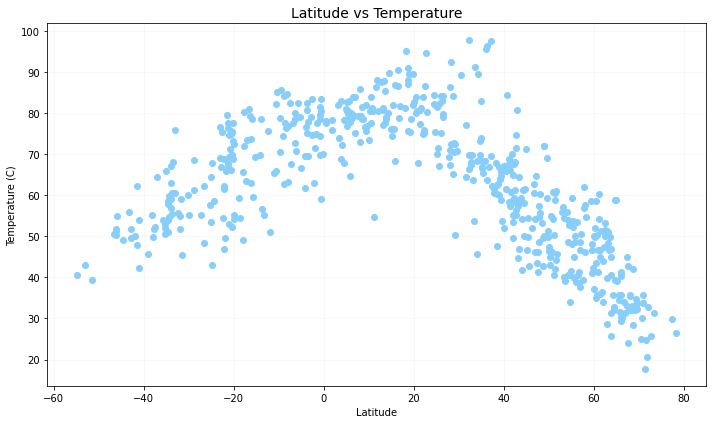

In [14]:
plt.figure(figsize=(10,6))

plt.scatter(df2.Latitude, df2.Temperature, color = 'lightskyblue')

plt.title("Latitude vs Temperature", fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")

plt.grid(axis="both", alpha=0.1)

plt.tight_layout()
plt.savefig("latVtemp.png")
plt.show()

In [15]:
# The code for Latitude vs Temperature is analyzing how temperature changes as latitude changes. 
# We see that temperature increases the close to the equator (0 on Latitude) and colder as you move away both positive and negative.

## Latitude vs. Humidity Plot

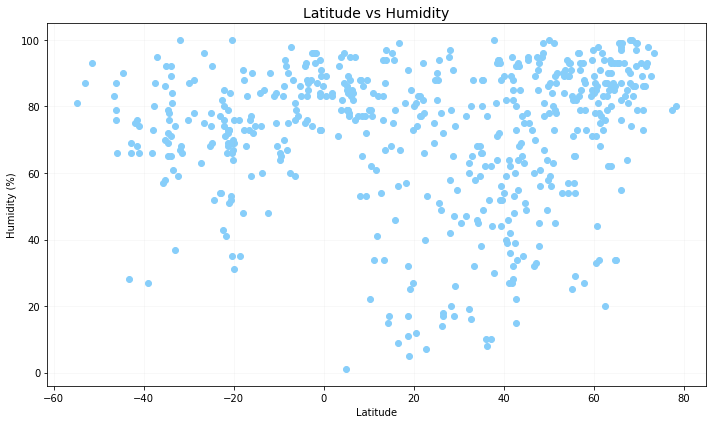

In [16]:
plt.figure(figsize=(10,6))

plt.scatter(df2.Latitude, df2.Humidity, color = 'lightskyblue')

plt.title("Latitude vs Humidity", fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid(axis="both", alpha=0.1)

plt.tight_layout()
plt.savefig("latVhumid.png")
plt.show()

In [17]:
# The code for Latitude vs Humidity is analyzing how humidity varies across latitudes. 
# Humidity seems to not have a strong correlation with latitude. The plot shows that humidity is consistently high at latitude 0 and that there is more varience in the data on either side of it. 

## Latitude vs. Cloudiness Plot

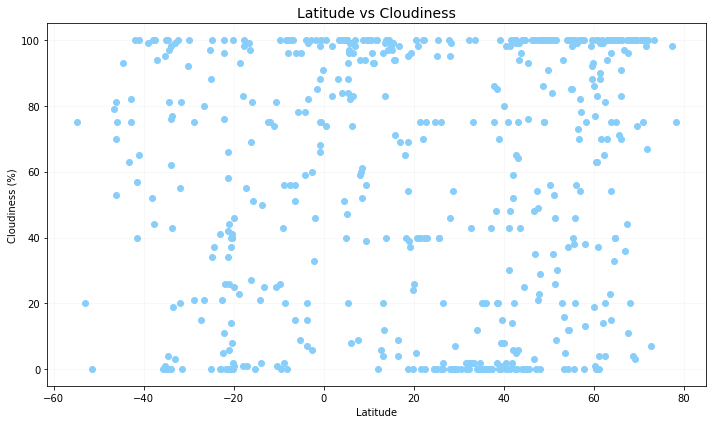

In [18]:
plt.figure(figsize=(10,6))

plt.scatter(df2.Latitude, df2.Cloudiness, color = 'lightskyblue')

plt.title("Latitude vs Cloudiness", fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid(axis="both", alpha=0.1)

plt.tight_layout()
plt.savefig("latVclouds.png")
plt.show()

In [19]:
# The code for Latitude vs Cloudiness is analyzing how cloudiness varies across latitudes. 
# There seems to be no correlation between cloudiness and latitude.

## Latitude vs. Wind Speed Plot

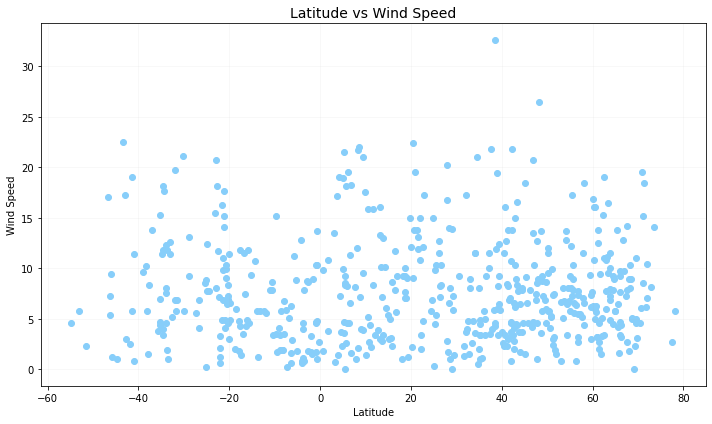

In [20]:
plt.figure(figsize=(10,6))

plt.scatter(df2.Latitude, df2.Wind_Speed, color = 'lightskyblue')

plt.title("Latitude vs Wind Speed", fontsize=14)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.grid(axis="both", alpha=0.1)

plt.tight_layout()
plt.savefig("latVwind.png")
plt.show()

In [21]:
# The code for Latitude vs Wind Speed is analyzing how wind speed varies across latitudes. 
# There seems to be 3 spikes in the data. Wind speeds pickup around the -30, 10, and 60 latitude marks.

## Linear Regression

In [22]:
# Seperate data into North and South Hemispheres
nh_mask = df2.Latitude >= 0
sh_mask = df2.Latitude < 0

nh = df2.loc[nh_mask]
sh = df2.loc[sh_mask]

sh.head()

,City,Country,Latitude,Longitude,Date,Wind_Speed,Pressure,Humidity,Temperature,Cloudiness
1,Sorong,ID,-0.8833,131.2500,1652915676,4.65,1013,84,79.57,98
3,Mataura,NZ,-46.1927,168.8643,1652915624,7.25,994,87,50.23,70
4,Busselton,AU,-33.6500,115.3333,1652915680,1.95,1015,84,60.46,77
5,Ushuaia,AR,-54.8000,-68.3000,1652915458,4.61,1011,81,40.66,75
6,Bambous Virieux,MU,-20.3428,57.7575,1652915682,6.91,1019,69,75.45,40


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7419203561894457


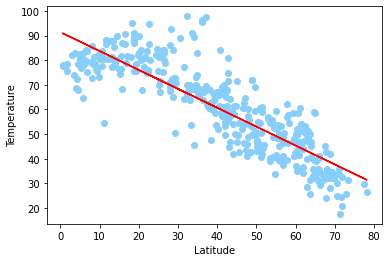

In [23]:
x_values = nh['Latitude']
y_values = nh['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = 'lightskyblue')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(0,0),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Temperature')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [24]:
# This linear regression proves that as we move away from 0 latitude, temperatures decrease.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5323940164034349


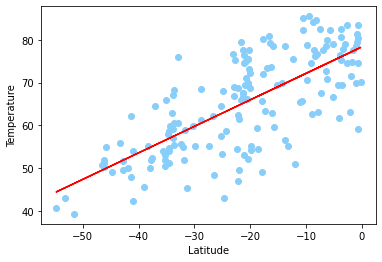

In [25]:
x_values = sh['Latitude']
y_values = sh['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = 'lightskyblue')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-55,30),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Temperature')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [26]:
# This shows a similar trend as the northern hemisphere. 
# There are more outliers in this data, specifically lower temeratures. This could be the result of climate change.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03718737084039458


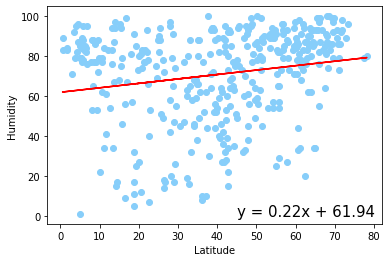

In [27]:
x_values = nh['Latitude']
y_values = nh['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = 'lightskyblue')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(45,0),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [28]:
# There is no linear relationship between the latitude and humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.039136903121167806


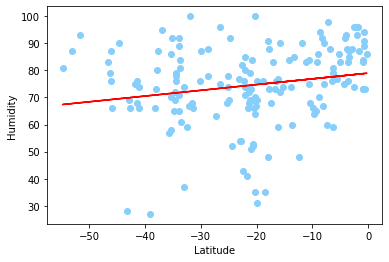

In [29]:
x_values = sh['Latitude']
y_values = sh['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = 'lightskyblue')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-55,20),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [30]:
# The same observation can be made on the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0039344963151207845


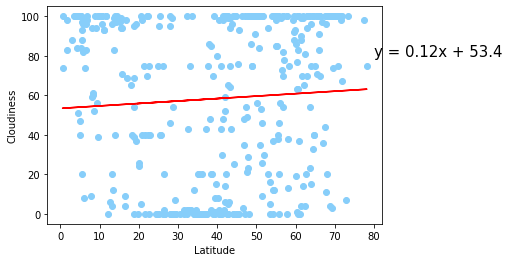

In [31]:
x_values = nh['Latitude']
y_values = nh['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = 'lightskyblue')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(80,80),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [32]:
# There is no linear relationship between cloudiness and laitude based on the regression.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0005417073918339048


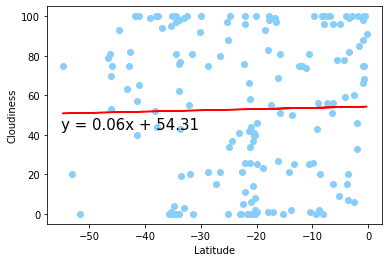

In [33]:
x_values = sh['Latitude']
y_values = sh['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = 'lightskyblue')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(-55,43),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [34]:
# Similar to the northern hemisphere, there is no linear relationship between cloudiness and laitude based on the regression.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.004324418790494669


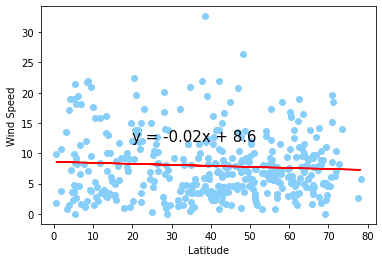

In [35]:
x_values = nh['Latitude']
y_values = nh['Wind_Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = 'lightskyblue')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(20,12),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [36]:
# There is a slight correlation between wind speed and latitude.
# Despite the regression being better than that of cloudiness and humidity, there are still a fair amount of outliers on the plot. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06718904923861807


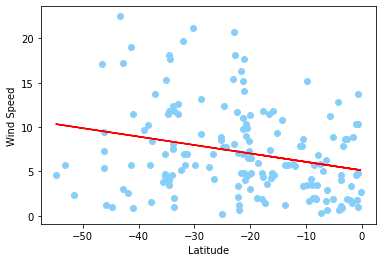

In [37]:
x_values = sh['Latitude']
y_values = sh['Wind_Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color = 'lightskyblue')
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(20,12),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [ ]:
# The southern hemisphere shows a better regression, but this could be the result of less data points being available.